# The limits of LDA

Here, we will explore the limitations of LDA and how some of them can be overcome. To this end, two datasets will be used


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.lda import LDA

## Preprocess the features
Sometimes, some of the features clearly violate the __linear separability__ assumption made by LDA. In that case, features can be pre-processed by applying a given function to each feature, which yields a Generalized Linear Discriminant analysis:

$$ y = \sum_i^D w_i f_i(\mathbf{x}_i) $$ 

__Task:__ Follow the steps (1) to (4) in the code below.

Accuracy:  0.72


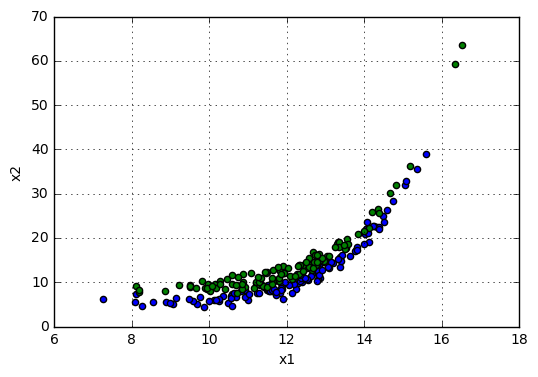

In [32]:
% matplotlib inline
# (1) load data
ds_data = 'data/non-lin_train.data'
ds_labels ='data/non-lin_train.labels'
X = np.loadtxt(ds_data)
y = np.loadtxt(ds_labels)
n_samples = len(y)

# (2) split into training and validation
idx_all = np.arange(n_samples)
np.random.seed(1234)
np.random.shuffle(idx_all)
idx_tr = idx_all[:int(0.8*n_samples)]
idx_val = idx_all[int(0.8*n_samples):]
X_tr = X[idx_tr,:]
y_tr = y[idx_tr]
X_va = X[idx_val,:]
y_va = y[idx_val]


# (3) scatter-plot data with corresponding labels
idx_c1 = np.where(y_tr == 0)[0]
idx_c2 = np.where(y_tr == 1)[0]
plt.figure()
plt.scatter(X_tr[idx_c1,0],X_tr[idx_c1,1],c='b')
plt.scatter(X_tr[idx_c2,0],X_tr[idx_c2,1],c='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
# (4) classify un-processed data
clf = LDA()
clf.fit(X_tr, y_tr)
score = clf.score(X_va, y_va)
print('Accuracy:  %.2f'%score)

#### Q2.4.1) Which LDA assumption(s) are violated by the provided dataset?
__Answer__: The dataset violates the Gaussianity distribution of the features, as seen by the exponential behavior of feature x2.
#### Q2.4.2) In which way can the feature(s) be preprocessed in order to improve the performance? Hint: Think of polynomials, trigonometric functions, logarithms, exponential functions, etc.
__Answer__: A first approach can be applying a logarithmic function in order to get rid of the exponential behavior of feature x2.

Accuracy:  0.90


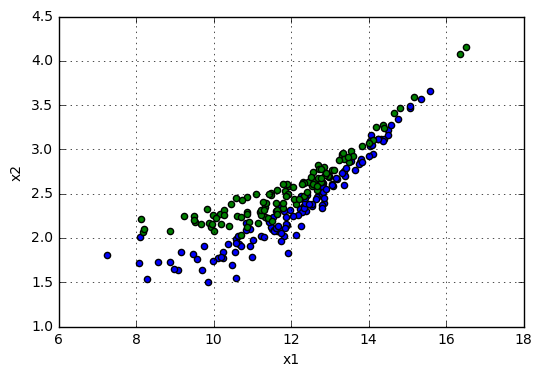

In [33]:
# 2-> Preprocess your features
# 3-> Check the performance of your LDA classifier

# 2nd feature seem to have a quadratic behavior
# maybe applying a logarithm might help
X_tr = X[idx_tr,:]
X_va = X[idx_val,:]

X_tr[:,1] = np.log(X_tr[:,1])
X_va[:,1] = np.log(X_va[:,1])
plt.figure()
plt.scatter(X_tr[idx_c1,0],X_tr[idx_c1,1],c='b')
plt.scatter(X_tr[idx_c2,0],X_tr[idx_c2,1],c='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
# classify processed data
clf = LDA()
clf.fit(X_tr, y_tr)
score = clf.score(X_va, y_va)
print('Accuracy:  %.2f'%score)

# load test data
ds_data = 'data/non-lin_test.data'
#ds_labels ='data/non-lin_test.labels'
X_te = np.loadtxt(ds_data)
y_te = np.loadtxt(ds_labels)
X_te[:,1] = np.log10(X_te[:,1])

y_predict = clf.predict(X_te)

## Feature extraction
__Tasks:__ 
 1. Visualize the given toy 2D-dataset. 
 2. Train an LDA classifier on the given data. Remember to split your data set into training and validation set. Which performance do you achieve?


There appears to be some exploitable structure in your data, but the LDA is not directly able to capture this.

#### Q2.4.3) In what way can the existing features be combined in order to get a __linearly separable__ dataset? 

__Hint:__ Try to think of it in a 3D way: How would you add another dimension such that the 2 classes can be separated by a plane?

__Answer__: The distance between each point and the center of the distribution acts as a feature that makes the problem linearly separable.

__Tasks__: 
1. Implement your additional feature that combines the existing features. 
2. Calculate the performance of LDA using this additional feature and see if you can improve upon the performance.

Accuracy raw features:  0.33
Accuracy with new feature:  0.96


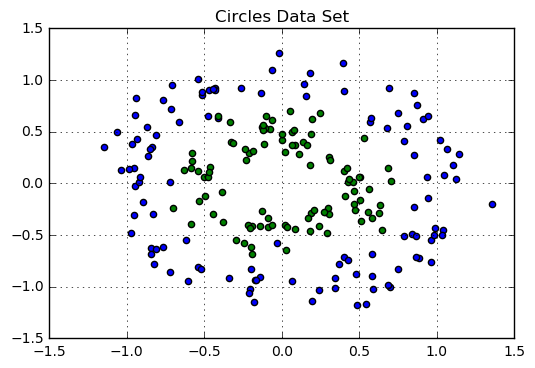

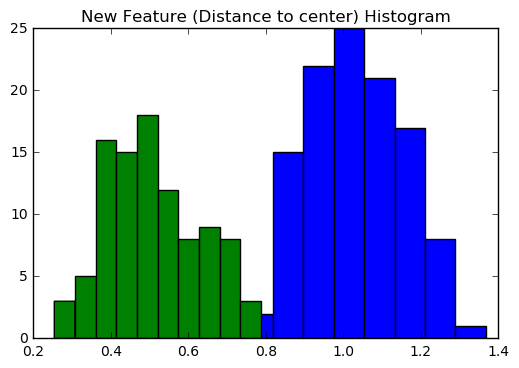

In [34]:
# 1-> Scatter-plot your 2D-data.
# load data
np.random.seed(1337)
ds_data = 'data/circles_train.data'
ds_labels ='data/circles_train.labels'
X = np.loadtxt(ds_data)
y = np.loadtxt(ds_labels)
n_samples = len(y)

# split into training and validation
idx_all = np.arange(n_samples)
np.random.shuffle(idx_all)
idx_tr = idx_all[:int(0.7*n_samples)]
idx_val = idx_all[int(0.7*n_samples):]
X_tr = X[idx_tr,:]
y_tr = y[idx_tr]
X_va = X[idx_val,:]
y_va = y[idx_val]

# scatter-plot data with corresponding labels
idx_c1 = np.where(y_tr == 0)[0]
idx_c2 = np.where(y_tr == 1)[0]
plt.figure()
plt.title('Circles Data Set')
plt.scatter(X_tr[idx_c1,0],X_tr[idx_c1,1],c='b')
plt.scatter(X_tr[idx_c2,0],X_tr[idx_c2,1],c='g')
plt.grid()

# classify original data
clf = LDA()
clf.fit(X_tr, y_tr)
score = clf.score(X_va, y_va)
print('Accuracy raw features:  %.2f'%score)

# 2-> Combine the 2 existing features so a LDA classifier works
# compute new features and add them to training and validation set
feat_new = np.atleast_2d(np.linalg.norm(X_tr,axis=1)).T
X_tr = np.append(X_tr,feat_new,axis=1)
feat_new_va = np.atleast_2d(np.linalg.norm(X_va,axis=1)).T
X_va = np.append(X_va,feat_new_va,axis=1)

clf = LDA()
clf.fit(X_tr, y_tr)
score = clf.score(X_va, y_va)
print('Accuracy with new feature:  %.2f' % score)

plt.figure()
plt.title('New Feature (Distance to center) Histogram')
plt.hist(feat_new[idx_c1],bins=10,color='b');
plt.hist(feat_new[idx_c2],bins=10,color='g');

## What else can go wrong?

__Task:__ Visualize the data set.

#### Q2.4.4) What LDA assumption(s) are violated by the next dataset?. What would be an optimal decision boundary? Bonus: Find out which method would provide an optimal decision boundary. 

__Hint:__ It is slightly more general than the LDA algorithm.

__Answer:__ The dataset violates the assumption of equal covariance matrix for both classes. In this case, the use of Quadratic Discriminant Analysis QDA provides an optimal decision boundary because it drops the assumption of equal covariance matrices for both classes.

Accuracy LDA:  0.84
Accuracy QDA:  0.96


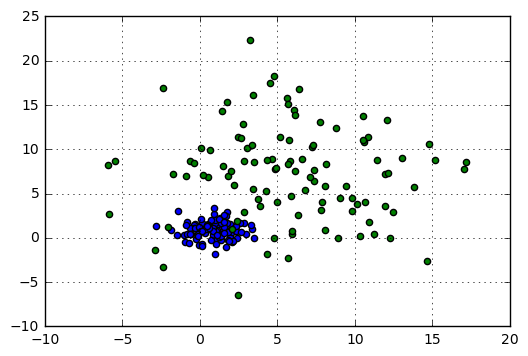

In [35]:
from sklearn.qda import QDA
np.random.seed(1337)
ds_data = 'data/unbalanced_train.data'
ds_labels ='data/unbalanced_train.labels'
X = np.loadtxt(ds_data)
y = np.loadtxt(ds_labels)

# 1-> Scatter-plot your 2D-data.
# 2-> What is the optimal decision boundary?

# load data
ds_data = 'data/unbalanced_train.data'
ds_labels ='data/unbalanced_train.labels'
X = np.loadtxt(ds_data)
y = np.loadtxt(ds_labels)
n_samples = len(y)

# split into training and validation
idx_all = np.arange(n_samples)
np.random.shuffle(idx_all)
idx_tr = idx_all[:int(0.7*n_samples)]
idx_val = idx_all[int(0.7*n_samples):]
X_tr = X[idx_tr,:]
y_tr = y[idx_tr]
X_va = X[idx_val,:]
y_va = y[idx_val]

# scatter-plot data with corresponding labels
idx_c1 = np.where(y_tr == 0)[0]
idx_c2 = np.where(y_tr == 1)[0]
plt.figure()
plt.scatter(X_tr[idx_c1,0],X_tr[idx_c1,1],c='b')
plt.scatter(X_tr[idx_c2,0],X_tr[idx_c2,1],c='g')
plt.grid()

# classify un-processed data
clf = LDA()
clf.fit(X_tr, y_tr)
score = clf.score(X_va, y_va)
print('Accuracy LDA:  %.2f' % score)

# implement a QDA classifier
clf_QDA = QDA()
clf_QDA.fit(X_tr, y_tr)
score_QDA = clf_QDA.score(X_va, y_va)
print('Accuracy QDA:  %.2f' % score_QDA)